In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Importing Dataset**

In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

# **Data Preprocessing**

In [6]:
# Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

* **ID:** Unique customer ID number.
* **Age:** Age of the customer in years.
* **Experience:** Number of years of work experience the customer has.
* **Income:** Annual income of the customer in dollars.
* **ZIP Code:** Home address ZIP code of the customer.
* **Family:** Number of family members of the customer.
* **CCAvg:** Average monthly credit card spending of the customer in dollars.
* **Education:** Education level of the customer, where 1 = Undergrad, 2 = Graduate, and 3 = Advanced/Professional.
* **Mortgage:** Total mortgage amount of the customer in dollars.
* **Personal Loan:** Whether or not the customer accepted a personal loan offer (1 = Yes, 0 = No).
* **Securities Account:** Whether or not the customer has a securities account with the bank (1 = Yes, 0 = No).
* **CD Account:** Whether or not the customer has a certificate of deposit account with the bank (1 = Yes, 0 = No).
* **Online:** Whether or not the customer uses internet banking facilities (1 = Yes, 0 = No).
* **CreditCard:** Whether or not the customer uses a credit card issued by the bank (1 = Yes, 0 = No).



In [8]:
# Dropping irrelevant columns
df.drop(['ID','ZIP Code'],axis = 1,inplace = True)

In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# **3. EDA**

In [10]:
import plotly.express as ps

In [11]:
# Plotting Box Plot
fig = ps.box(df , y = ['Age','Experience','Income','Family','Education'])
fig.show()

In [12]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
# df.skew() is a pandas DataFrame method that calculates the skewness of each numerical column in the DataFrame. 
# Skewness is a measure of the asymmetry of the probability distribution of a random variable.
# if the skewness of a column is positive, it means that the distribution of values is skewed to the right (i.e., there are more values on the left side of the distribution and a long tail on the right). 
# Conversely, if the skewness is negative, the distribution is skewed to the left. If the skewness is close to zero, the distribution is roughly symmetric.
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

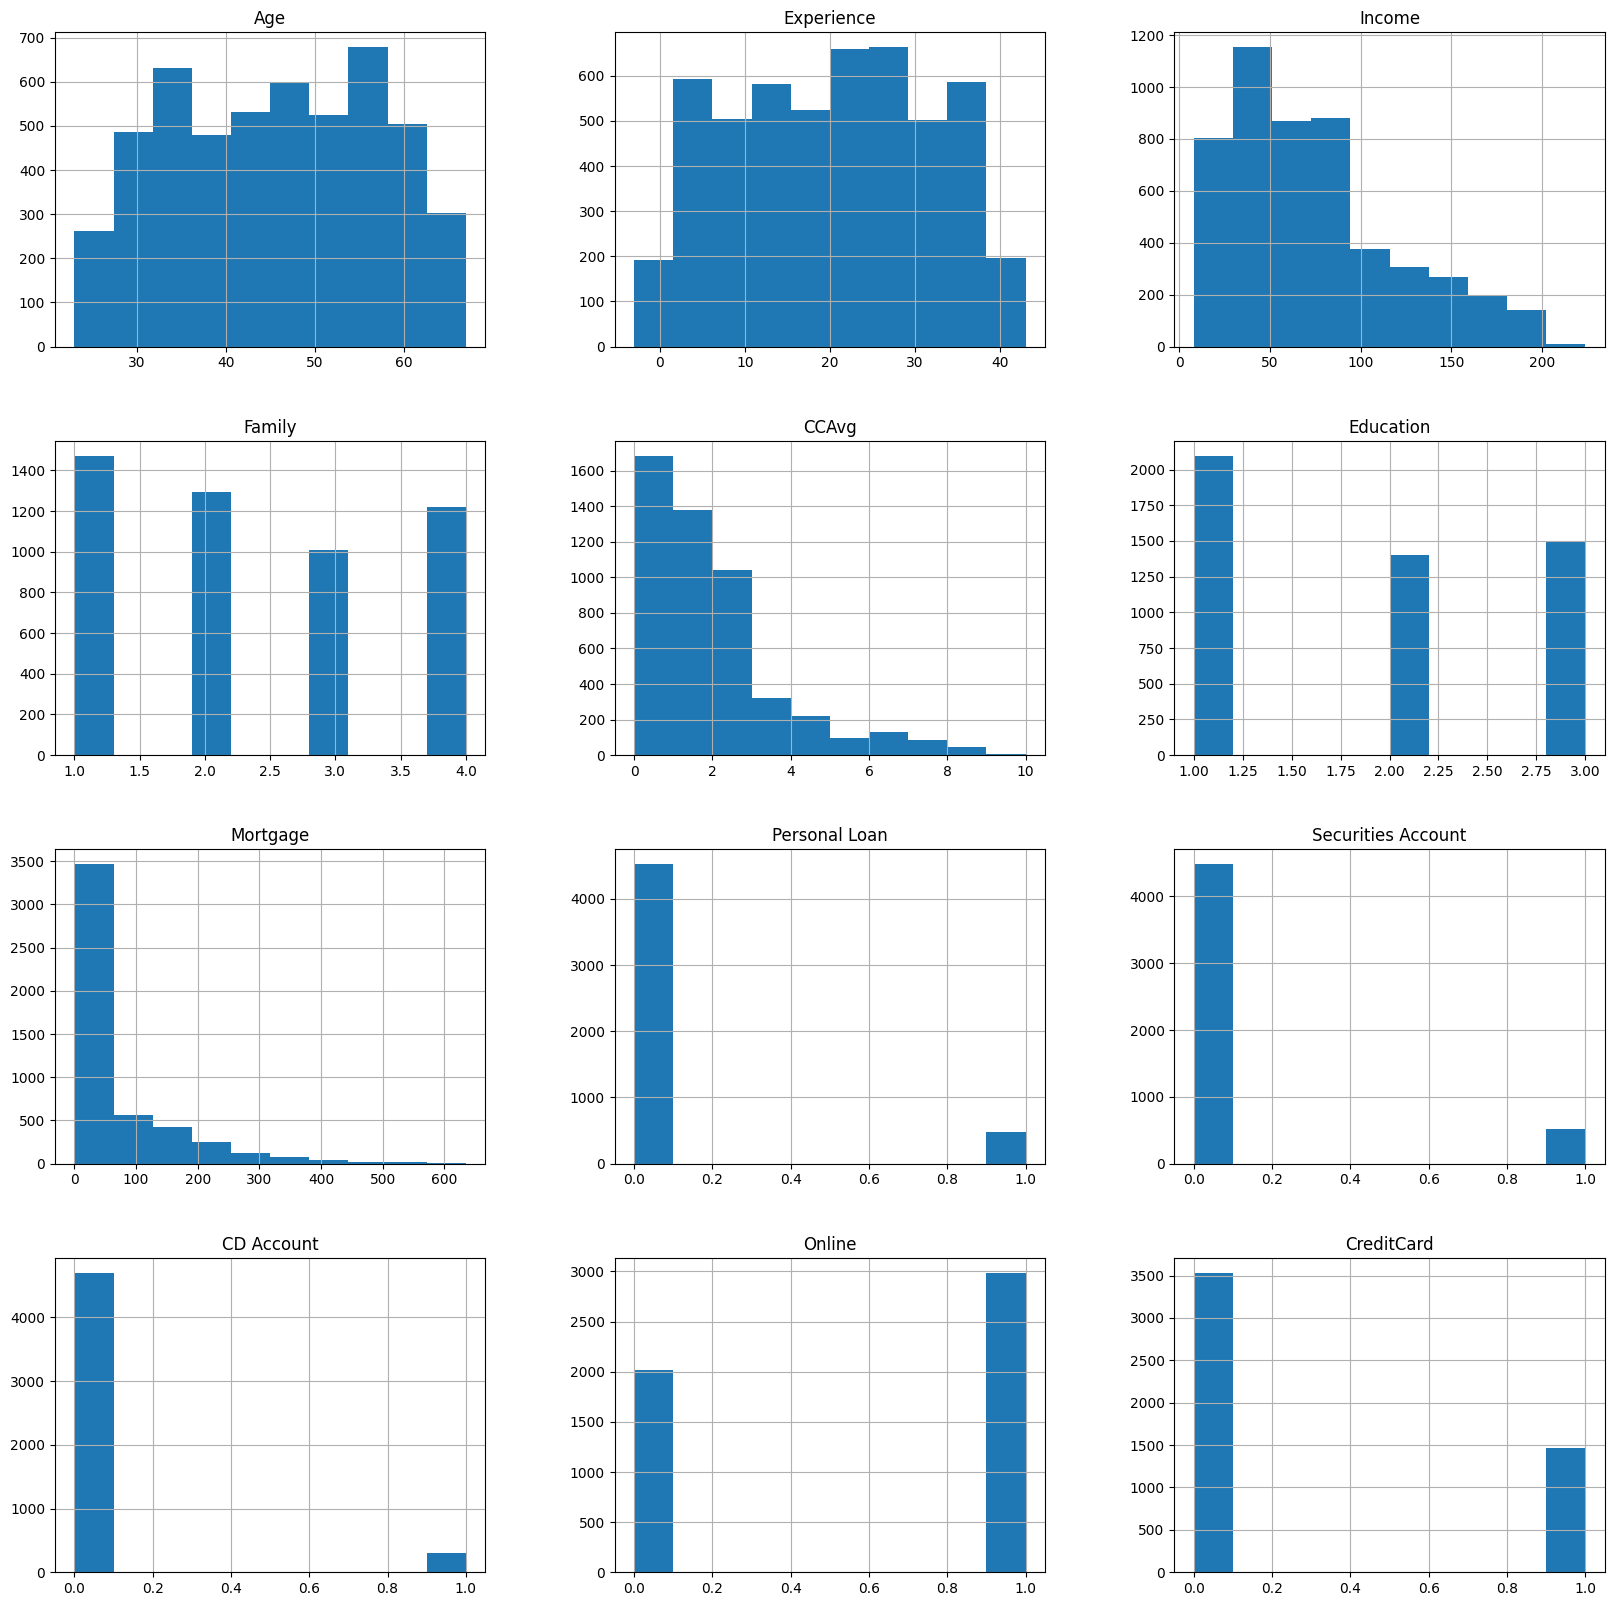

In [15]:
df.hist(figsize = (20,20))

<ipython-input-16-c295d2895934>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

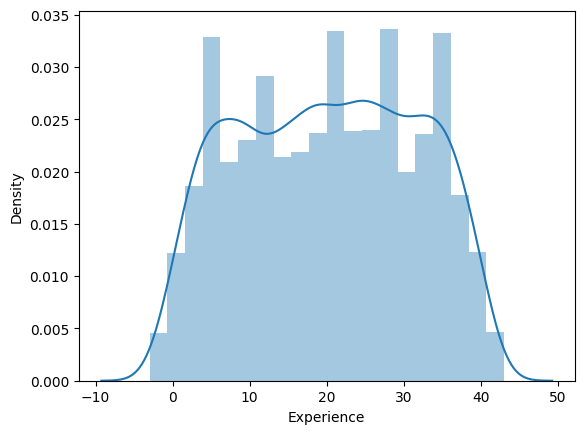

In [16]:
sns.distplot(df['Experience'])

In [17]:
df['Experience'].mean()

20.1046

In [18]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [19]:
negative_exp.shape

(52, 12)

There are 52 records where experience is in negative.

In [20]:
df = df[df['Experience']>=0]
df.shape

(4948, 12)

In [21]:
df['Experience'].mean()

20.33104284559418

<ipython-input-22-0fafe04ea3f6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

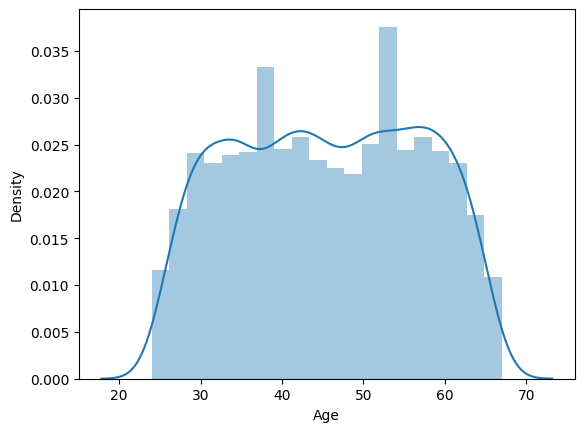

In [22]:
sns.distplot(df['Age'])

In [23]:
df['Age'].mean()

45.5571948261924

<Axes: >

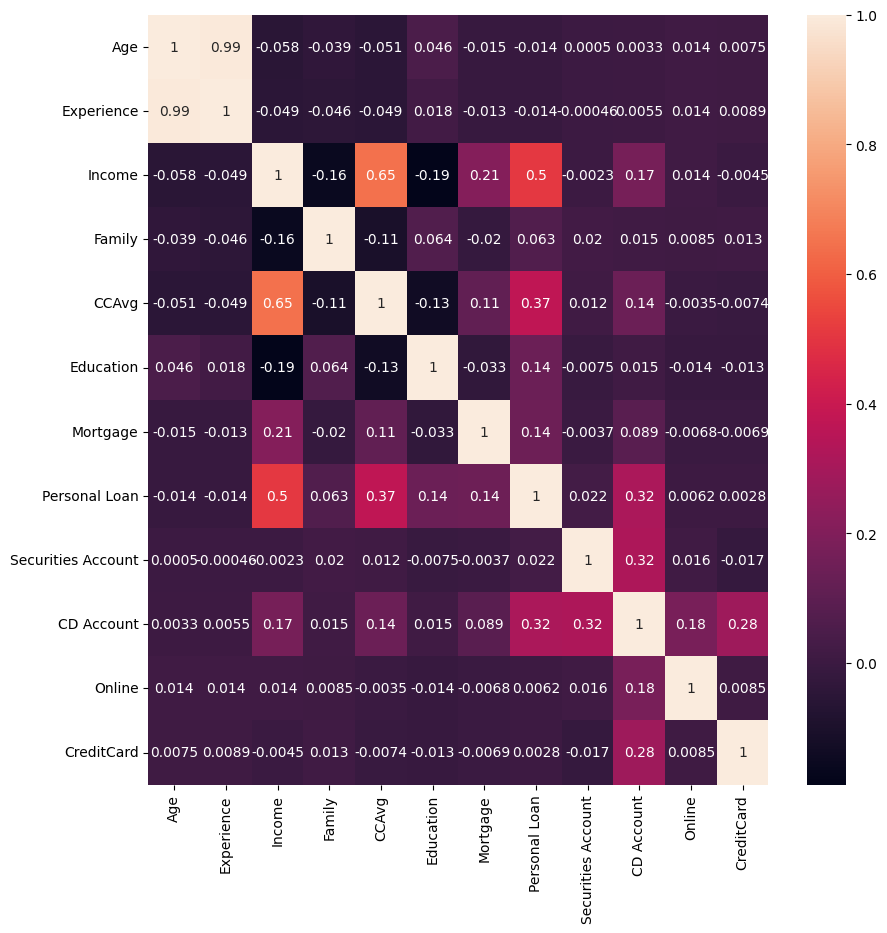

In [24]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(df.corr(),annot = True)

In [25]:
# Deleting column Experience
del df['Experience']

In [26]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


<ipython-input-27-332167f08bea>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

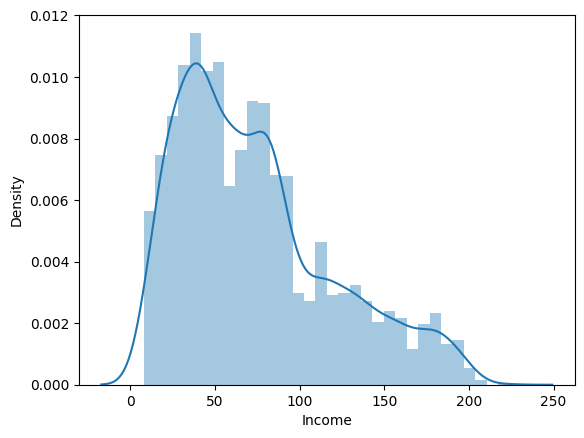

In [27]:
sns.distplot(df['Income'])

<ipython-input-29-d758aac711f8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Family', ylabel='Density'>

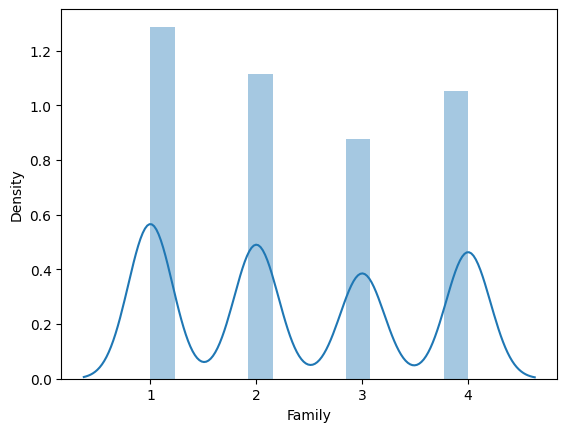

In [29]:
sns.distplot(df['Family'])

In [31]:
df['Family'].value_counts()

1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64

<ipython-input-32-adf2e82b575c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CCAvg', ylabel='Density'>

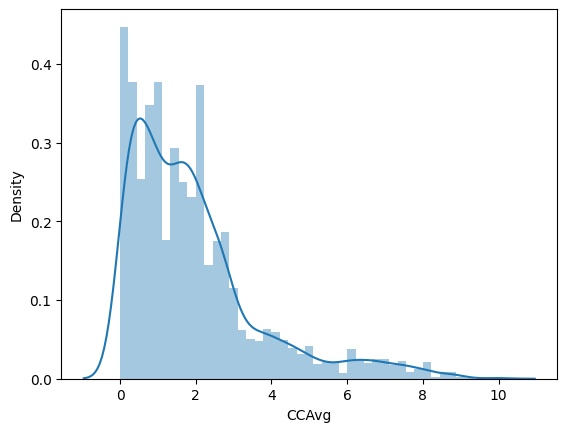

In [32]:
sns.distplot(df['CCAvg'])

In [36]:
def edu(x): 
  if x==1: 
    return "Undergraduate" 
  elif x==2: 
    return "Graduate" 
  else: 
    return "Professional"

In [37]:
df['EDU'] = df['Education'].apply(edu)

<ipython-input-37-00630c63feb5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [41]:
edu_vc = df['EDU'].value_counts()

In [42]:
fig = ps.pie(df, values =edu_vc,names = edu_vc.index, title = 'Pie Chart')
fig.show()

In [43]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Deposits"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securities & Deposits account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Securities account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposits account"

In [44]:
df['Account_holder_category'] = df.apply(security, axis = 1)

<ipython-input-44-18d3635af16c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Holds only Securities account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Holds only Securities account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,Does not hold Securities & Deposits account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not hold Securities & Deposits account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not hold Securities & Deposits account


In [47]:
ahc_vc = df['Account_holder_category'].value_counts()

In [48]:
fig = ps.pie(df, values =ahc_vc, names =ahc_vc.index, title = 'Pie Chart')
fig.show()

In [49]:
ps.box(df, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

<ipython-input-51-3bb3ca1d839a>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-51-3bb3ca1d839a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




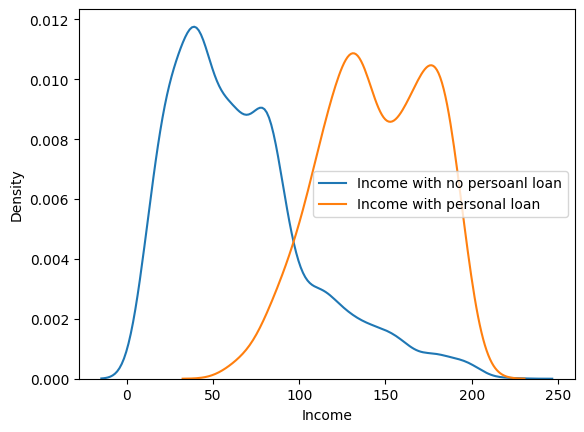

In [51]:
sns.distplot(df[df['Personal Loan'] == 0]['Income'], hist = False, 
            label = "Income with no persoanl loan")

sns.distplot(df[df['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

<ipython-input-52-e2c69e193e55>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-52-e2c69e193e55>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




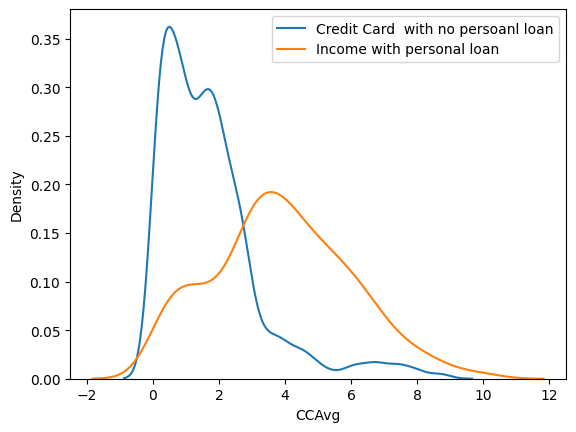

In [52]:
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'], hist = False, 
            label = "Credit Card  with no persoanl loan")

sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'], hist = False,
            label = "Income with personal loan")
plt.legend()

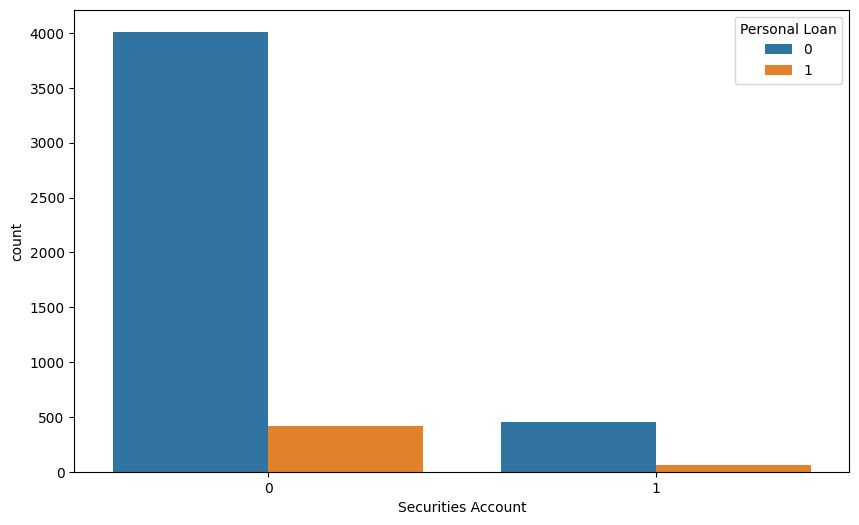

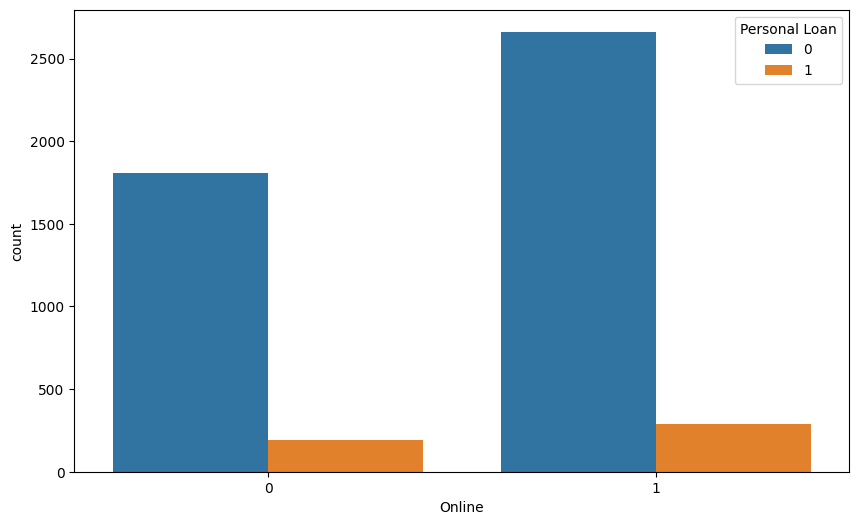

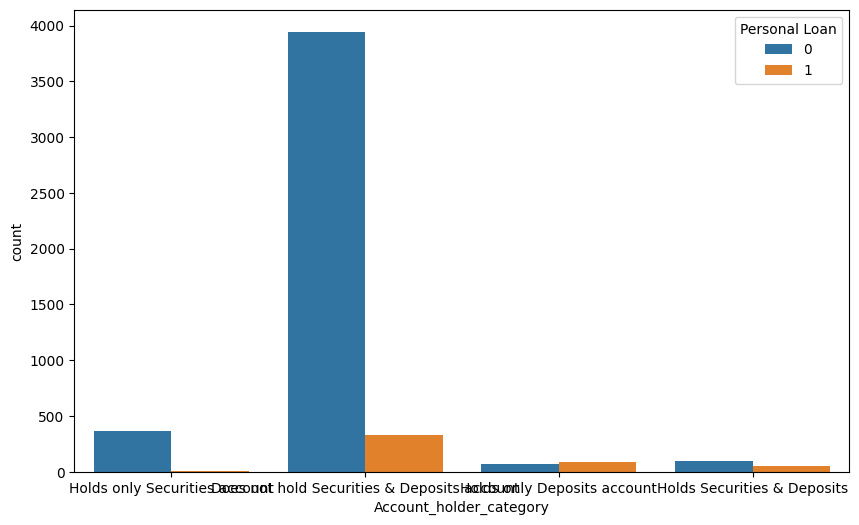

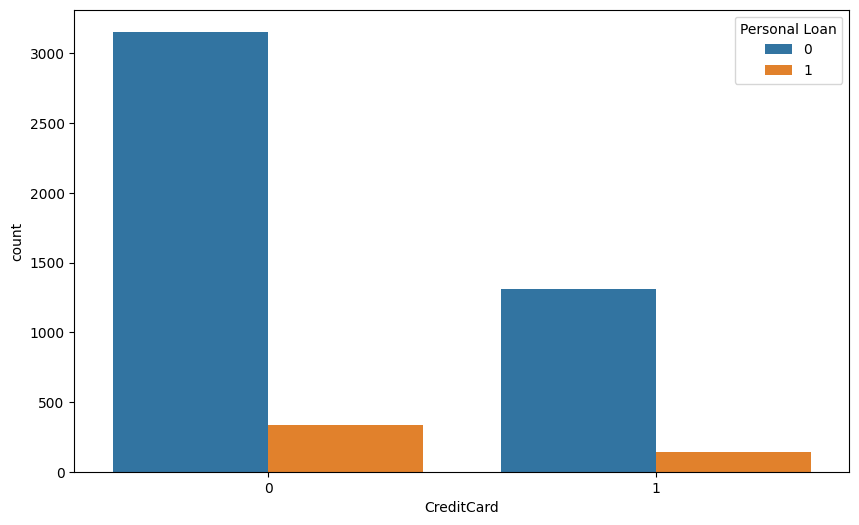

In [56]:
col = ['Securities Account', 'Online', 'Account_holder_category', 'CreditCard']
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = df, hue = 'Personal Loan')